# Mathematical solution

In [383]:
X = 13000
x1 = 8000
x2 = 5000
sigma1 = 0.5
sigma2 = 0.7
A = {"Goods are manufactured with excellent quality in the first plant"}
A = 0.85
B = {"Goods are manufactured with excellent quality in the second plant"}
B = 0.8
C = {"Seelected goods are manufactured with excellent quality"}

In [384]:
# by total probability theorem P(A) = P(B) P(A|B) + P(B′) P(A|B′)
a = x1 / X    # 8000 out of 13000 goods
b = x2 / X    # 5000 iut of 13000 goods
C = A * a + B * b
C

0.8307692307692308

In [385]:
# by Bayes' theorem P(A|B) = (P(B|A) * P(A)) / P(B)
D = a * A / C
print(f"Selected goods are manufactured in the first plant with a {D} chance.")

Selected goods are manufactured in the first plant with a 0.6296296296296297 chance.


In [386]:
# by Bayes' theorem P(A|B) = (P(B|A) * P(A)) / P(B)
E = b * B / C
print(f"Selected goods are manufactured in the second plant with a {E} chance.")

Selected goods are manufactured in the second plant with a 0.37037037037037035 chance.


In [387]:
# Checking if sum of both probabilities equal to 1
F = D + E
F

1.0

# Code solution

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import random
from sklearn.mixture import GaussianMixture

In [389]:
y1 = 13
y2 = 12

In [390]:
X1 = np.random.normal(loc=y1, scale=sigma1, size=8000)
X2 = np.random.normal(loc=y2, scale=sigma2, size=5000)
x = np.concatenate((X1, X2))
x

array([13.20883343, 12.94409913, 12.1603374 , ..., 11.70401677,
       13.54824929, 11.95035942])

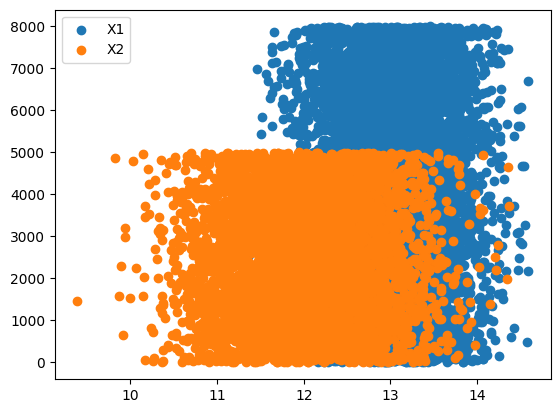

In [391]:
plt.scatter(X1, range(len(X1)), label="X1")
plt.scatter(X2, range(len(X2)), label="X2")
plt.legend()
plt.show()

In [392]:
gm = GaussianMixture(n_components=2).fit(x.reshape(-1, 1))
gm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [393]:
centers = gm.means_
print(centers)

[[11.90742896]
 [13.01490212]]


In [394]:
pred = gm.predict(x.reshape(-1, 1))
pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [395]:
a0 = x[pred == 1]
b0 = x[pred == 0]
a1 = len(a0)/X
b1 = len(b0)/X
C1 = A * a1 + B * b1
C1

0.834296153846154

In [396]:
D1 = a1 * A / C1
D1

0.6988341162748885

In [397]:
E1 = b1 * B / C1
E1

0.30116588372511144

In [398]:
D1 + E1

0.9999999999999999

# Conclusion

In [399]:
result = pd.DataFrame()
result["Lesson_51"] = ["Mathematical_solution", "Code_solution"]
result["Chanes_goods_are_from_first_plant"] = [D, D1]
result["Chanes_goods_are_from_second_plant"] = [E, E1]
result

,Lesson_51,Chanes_goods_are_from_first_plant,Chanes_goods_are_from_second_plant
0,Mathematical_solution,0.629630,0.370370
1,Code_solution,0.698834,0.301166


**The model defined classes and affected our result by few %. We checked it with mathematical solution.**